# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')
from statsmodels.stats.weightstats import ttest_ind

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

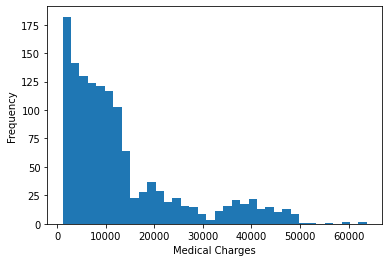

In [4]:
#Plot the histogram of charges
n_bins = np.sqrt(len(medical['charges']))
n_bins = int(n_bins)
plt.hist(medical['charges'], bins = n_bins)
plt.xlabel('Medical Charges')
plt.ylabel('Frequency')
plt.show()

In [5]:
#Calculation of charge's variable mean
mean = medical['charges'].mean()
print('The mean of the charges column is:', mean)

The mean of the charges column is: 13270.422265141257


In [6]:
#Calculation of charge's varible standard deviation

In [7]:
#Calculation of the standard deviation
std = medical['charges'].std()
print('The standard deviation of the charges column is:', std)

The standard deviation of the charges column is: 12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Assuming this data is normally distributed, we can justify this by creating new columns and each column will have samples selected randomly. Then, we would|calculate the mean of each new column and then plot the histogram of the mean's result. This histrogram would be approximately normally distributed and as much as new columns are aggregaed the mean would be close to the result 13,270.42. Therefore, we can sustained that the charges may not probably fell down 12,000. 

As a frequentist test, we can use np.random.choice() to create the histogram mentioned above and then create a confidence interval to see the probability to have charges below 12,000. Also calculate the mean and standard deviation to see if it follows the empirical rule of 66.66%, 85% and 99.97%

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Based on the frequentist test we just made, we can conclude that is very unlikely to have charges below 12,000. We defined a one side interval to see how many values are below 12,111.04 and it was 2.5%. In addition, we find the p_value and there is 2.6% of having charges below 12,000. This means statistical significance as well

In [8]:
def sampler(n):
    return np.random.choice(medical['charges'], n)

In [9]:
#Start the for loop to repeat and add the mean of each day to an empty array
number_tries = 500
seed(47)
sample = np.empty(number_tries)
for i in range(number_tries):
    sample[i] = np.mean(sampler(400))

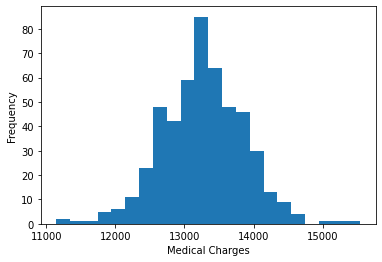

In [10]:
#Plot the Histogram
n_bins = np.sqrt(len(sample))
n_bins = int(n_bins)
plt.hist(sample, bins = n_bins)
plt.xlabel('Medical Charges')
plt.ylabel('Frequency')
plt.show()

In [11]:
#Calculation of the mean and standard deviation
mean = np.mean(sample)
std = np.std(sample, ddof = 1)
print('The approximate mean is:', mean)
print('The approximate standard deviation is:', std)

The approximate mean is: 13267.149203307465
The approximate standard deviation is: 589.8591422913464


In [12]:
#Calculation of our confidence Interval border 
border = norm.ppf(0.025, loc=mean, scale=std)
print('The 5% of the data is:', border)

The 5% of the data is: 12111.046528464738


In [13]:
#Calculation of the p-value
p_value = np.sum(sample < 12000)/len(sample)*100
print('The probability to have charges fell down below 12,000 is:', p_value, '%')

The probability to have charges fell down below 12,000 is: 2.6 %


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Null hypothesis: Insurance claim has direct relationship with the medical charges. Therefore, an insurance claim means higher medical charges.

Alternative hypothesis would be that an insurance claim would not necessarily mean higher medical charges

Lastly, the final assumption is homogeneity of variance. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ Based on the p-value, we got statistical significance that insurance claim would mean higher medical charges

As we can see, we got exactly the same answer using both methods.

In [15]:
#To use the formula, first we get the mean and the standard deviation from the insurance claim column
mean2 = medical['insuranceclaim'].mean()
std2 = medical['insuranceclaim'].std()

In [16]:
#We will divide the first equation in three terms to make easier the computations and get the pooled standard deviation
term1 = (len(sample)-1) * (std**2)
term2 = (len(medical['insuranceclaim'])-1) * (std2**2)
term3 = len(sample) + len(medical['insuranceclaim']) - 2
sp = np.sqrt((term1 + term2)/term3)
print('The pooled standard deviation is:', sp)

The pooled standard deviation is: 307.51241614729196


In [22]:
#To calculate the t-statistics, same as before, divide the equation in terms to make easier the calculations
term1 = mean - mean2
term2 = (1/len(sample)) + (1/len(medical['insuranceclaim']))
t = term1/(sp * np.sqrt(term2))
print('The t-statistic value is:', t)

The t-statistic value is: 823.0687375829172


In [36]:
#Perform the test using the scipy stats library
stats.ttest_ind(sample ,medical['insuranceclaim'], equal_var = True)

Ttest_indResult(statistic=823.0687375829174, pvalue=0.0)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ Scipy stats has the function statsmodels.stats.weightstats.ztest that allows to perform a Z-test from a sample. 

The complete function can be seen as statsmodels.stats.weightstats.ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)

We can also compare two means, assuming they are independent and have the same standard deviation. 
If is needed to compare means from distributions with different standard deviation, we should use CompareMeans.ztest_ind. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test